***This HW will implement several different ways of training linear regression model ***

**Due Feb 23, 2021 3:30PM**
(total: 10 points)



1.   submit ipynb in the Dropbox folder via BeachBoard (Not email)
2.   follow the instructions and fill the blanks in this Jupyter notebook




**important:** In order to open this Python files with Google Colaboratory, you need to have a Gmail account and sign in to that account. This will automatically allow you to open the Python files with Google Colaboratory. Then once you open the file, it will be in read-only mode, so in order to code inside you just have to go to File, and then click "Save a copy in Drive". This will create a copy of this file on your drive, inside which you will be able to code in Python.

# Setup (*Do Not change*)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) #to make this notebook's output stable across runs

#prepare the dataset (*Do Not change*)

In [38]:
X = 2 * np.random.rand(100,1)
#print(x)
y = 4 + 3 * X + np.random.randn(100, 1)

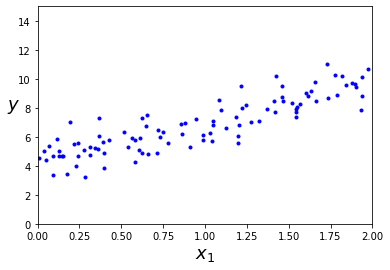

In [39]:
#visualize the dataset
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#**1st way**: Linear regression using sklearn library (*Do Not change*)

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [41]:
#make prediction on X_new
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

#**2nd way**: Linear regression using normal equation (*Your turn!!!*)

# 1. add x0 = 1 to each instance (1 point)

In [42]:
#your code
x0 = np.ones((np.size(X[:,0]), 1))
x0_X = np.column_stack((x0, X))
# debug
# print(type(x0_X))

# 2. write the normal equation using np.linalg (2 points)

In [43]:
#your code
# NOTE: np.invert gives type error, use np.linalg.inv instead
# follow the equation from the notes
w = np.linalg.inv(np.transpose(x0_X).dot(x0_X)).dot(np.transpose(x0_X)).dot(y)

# 3. print weights

In [44]:
#your code
print(w)

[[4.21509616]
 [2.77011339]]


# 4. make prediction on X_new (from the 1st part), but before predicting, you need to add x0=1 to each instance (1 point)

In [45]:
#your code
# create a ones array then append it
x0 = np.ones((np.size(X_new[:,0]), 1))
x0_Xnew = np.column_stack((x0, X_new))
pred = np.dot(x0_Xnew, w)
# debug
# print(pred)


# 5. plot this model's prediction line (2 points)

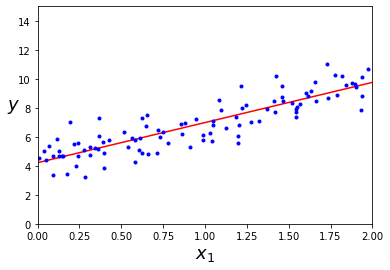

In [46]:
#your code
# plot the prediction using the results from the normal equation calculation
plt.plot(X_new, pred, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#**3rd way**: Linear Regression using batch gradient descent (*Your turn!!!*)

In [64]:
#Do not change this code cell
eta = 0.2  # learning rate
n_iterations = 1000
weights_gd = np.random.randn(2,1)  # random initialization

# 1. write gradient descent without using sklearn (3 points)

In [65]:
#your code
# follow the equation from the notes
# NOTE: there's a typo in the notes (y - Xw) should be (Xw - y) which is what this code reflects to get correct results
w = np.linalg.inv(np.transpose(x0_X).dot(x0_X)).dot(np.transpose(x0_X)).dot(y)
for n in range(n_iterations):
    weights_gd = weights_gd + eta * (-1/np.size(X[:,0])) * np.transpose(x0_X).dot(np.dot(x0_X, weights_gd) - y)
# debug
# weights_gd


array([[4.21509616],
       [2.77011339]])

# 2. print weights

In [66]:
#your code
print(weights_gd)

[[4.21509616]
 [2.77011339]]


# 3. make prediction on X_new(from the 1st part), you also need to add x0=1 to each instance before making prediction (1 point)

[[4.21509616]
 [9.75532293]]


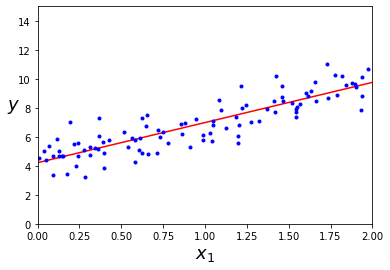

In [84]:
#your code
x0 = np.ones((np.size(X_new[:,0]), 1))
x0_Xnew = np.column_stack((x0, X_new))
pred = np.dot(x0_Xnew, weights_gd)
print(pred)

# plot the prediction using the results from the gradient descent calculation
plt.plot(X_new, pred, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()